<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-4df13306bf58>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Upper management will like to get some insight into the following.

- Is there a significant difference in the median value of houses bounded by the Charles river or not?

- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 



Project Tasks:

**Task 1**: Familiarize yourself with the dataset 
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000

- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

**Task 2**: Generate basic statistics and visualizations for upper management. 
Generate the following and explain your findings:
- For the "Median value of owner-occupied homes" provide a boxplot
- Provide a  bar plot for the Charles river variable
- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
- Create a histogram for the pupil to teacher ratio variable

**Task 3**: Use the appropriate tests to answer the questions provided.
For each of the following questions;

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

*Be sure to:*

- *State your hypothesis.*
- *Use α = 0.05*
- *Perform the test Statistics.*
- *State the conclusion from the test.*

**Task 4**: Share your Jupyter Notebook.

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 2

<AxesSubplot:xlabel='MEDV'>

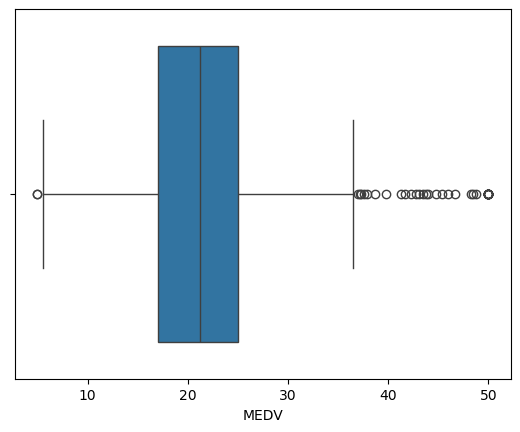

In [17]:
# For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(x='MEDV',  data=boston_df)

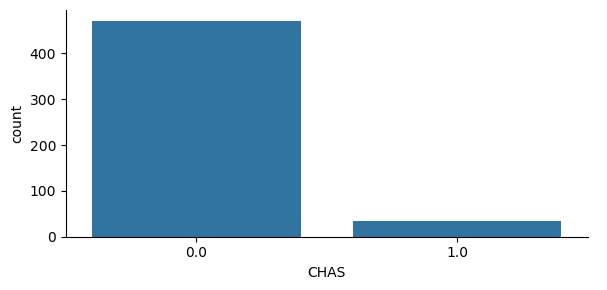

In [20]:
# Create barchart
sns.catplot(x = 'CHAS', kind = 'count', data = boston_df, height = 3, aspect = 2)

<AxesSubplot:ylabel='MEDV'>

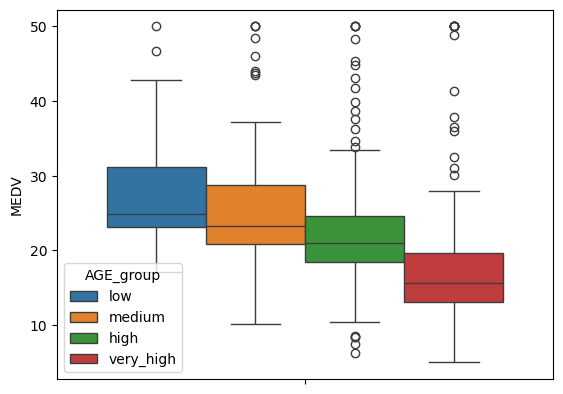

In [15]:
# Create a boxplot
sns.boxplot( y="MEDV", hue = "AGE_group", data=boston_df)

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

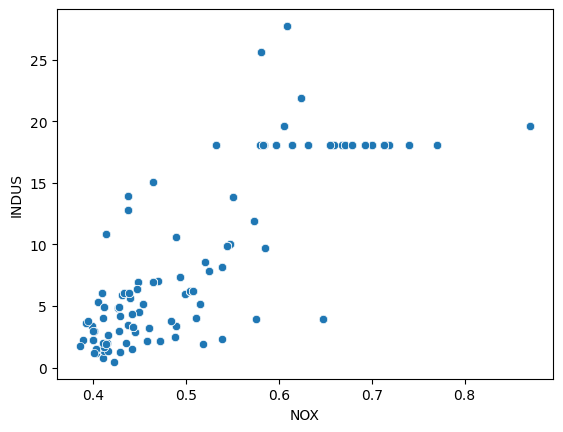

In [19]:
#Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

In [ ]:
# Create a histogram for the pupil to teacher ratio variable
ax=sns.histplot(data=boston_df, x="PTRATIO",binwidth=1,discrete=True)
ax.set(xlabel="Pupil to teacher ration")

## Task 3

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)


In [6]:
# Null Hypothesis (There is no significant difference in the median value of houses bounded by the Charles River (CHAS = 1) compared to those that are not (CHAS = 0).
#Alternative Hypothesis (There is a significant difference in the median value of houses bounded by the Charles River (CHAS = 1) compared to those that are not 
#(CHAS = 0). Mathematically, this can be stated as:

#Use the ttest_ind from the scipy_stats library
t_statistic, p_value = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var=False)

In [7]:
# Conclusion
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference in the median value of houses bounded by the Charles River compared to those that are not."
else:
    conclusion = "Fail to reject the null hypothesis. There is no significant difference in the median value of houses bounded by the Charles River compared to those that are not."

print(conclusion)

Reject the null hypothesis. There is a significant difference in the median value of houses bounded by the Charles River compared to those that are not.


#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [8]:

#Null Hypothesis (There is no difference in the median values of houses (MEDV) across the different age groups ('low', 'medium', 'high', 'very_high')
# of owner-occupied units built prior to 1940.
#Alternative Hypothesis (There is a difference in the median values of houses (MEDV) across the different age groups of owner-occupied units built prior to 1940.

# Creating a new column 'AGE_group' for the categories
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[-float('inf'), 30, 60, 90, float('inf')], labels=['low', 'medium', 'high', 'very_high'])

# Creating groups
low = boston_df[boston_df['AGE_group'] == 'low']['MEDV']
medium = boston_df[boston_df['AGE_group'] == 'medium']['MEDV']
high = boston_df[boston_df['AGE_group'] == 'high']['MEDV']
very_high = boston_df[boston_df['AGE_group'] == 'very_high']['MEDV']

#Running ANOVA
f_statistic, p_value = scipy.stats.f_oneway(low, medium, high, very_high)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 27.305009674502138, P-Value: 2.262063105392741e-16


In [9]:
# Conclusion
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference in the median values of houses (MEDV) across the different age groups ('low', 'medium', 'high', 'very_high') of owner-occupied units built prior to 1940."
else:
    conclusion = "Fail to reject the null hypothesis. There is no significant difference in the median values of houses (MEDV) across the different age groups ('low', 'medium', 'high', 'very_high') of owner-occupied units built prior to 1940."

print(conclusion)

Reject the null hypothesis. There is a significant difference in the median values of houses (MEDV) across the different age groups ('low', 'medium', 'high', 'very_high') of owner-occupied units built prior to 1940.


#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [10]:
# Null Hypothesis (There is no linear relationship between NOX and INDUS). 
#Alternative Hypothesis (There is a linear relationship between NOX and INDUS).

# Calculate the Pearson correlation coefficient and p-value
pearson_corr, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print the results
print("Pearson Correlation Coefficient: {:.4f}".format(pearson_corr))
print("P-Value: {:.4f}".format(p_value))

Pearson Correlation Coefficient: 0.7637
P-Value: 0.0000


In [11]:
# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant linear relationship between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis. There is no significant linear relationship between NOX and INDUS.")

Reject the null hypothesis. There is a significant linear relationship between NOX and INDUS.


#### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [12]:
#Null Hypothesis: The weighted distance to the Boston employment centres (DIS) has no impact on the median value of owner-occupied homes (MEDV).
#Alternative Hypothesis: The weighted distance to the Boston employment centres (DIS) has an impact (positive or negative) on the median value of owner-occupied homes (MEDV).

# Define X (independent variable) and y (dependent variable)
X = boston_df['DIS']  # Weighted distances to Boston employment centres
y = boston_df['MEDV']  # Median value of owner-occupied homes

# Add constant to X
X = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X).fit()

# Print model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        12:07:37   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As **p-value < 0.05**: We reject the null hypothesis. This suggests that there is a statistically significant impact of the weighted distance to Boston employment centres (DIS) on the median value of owner-occupied homes (MEDV).